In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:

def superimpose_edges(tissue, mask):


    # Find edges in the mask
    edges = cv2.Canny(mask, 100, 200)

    # Convert edges to color (just for visualization)
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    edges_colored[np.where((edges_colored == [255, 255, 255]).all(axis = 2))] = [0, 255, 0] # Color the edges green

    # Superimpose the edges on the tissue image
    superimposed_image = cv2.addWeighted(tissue, 1, edges_colored, 1, 0)

    return superimposed_image



In [15]:
index = 0
expt_path = "Outputs/experiment_12-22_14.40.24/"

In [16]:
tissueImagePath = f"{expt_path}inference/testDataNormal/{index}_img.png"
maskImagePath = f"{expt_path}inference/testDataNormal/{index}_label.png"
for path in os.listdir(f"{expt_path}inference/testDataNormal/"):
    if path.startswith(str(index)) and path.endswith("_predict.png"):
        predImagePath = f"{expt_path}inference/testDataNormal/{path}"


In [21]:
# load images
tissue = cv2.imread(tissueImagePath)
mask = cv2.imread(maskImagePath, 0)
pred = cv2.imread(predImagePath, 0)
superimposedImage = superimpose_edges(tissue, pred)

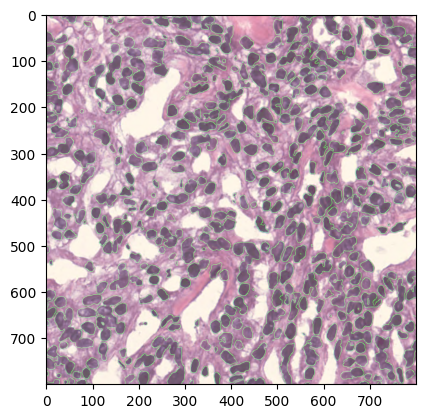

In [22]:
plt.imshow(superimposedImage)

In [ ]:
cv2.imwrite("Outputs/experiment_12-22_14.40.24/inference/superimposed/0_label.png", superimposedImage)

In [42]:
mode = "predict"   # label or predict or post
expt_path = "Outputs/experiment_10-23_11.51.44/"
for index in range(14):
    tissueImagePath = f"{expt_path}inference/testData/{index}_img.png"
    maskImagePath = f"{expt_path}inference/testData/{index}_label.png"
    for path in os.listdir(f"{expt_path}inference/testData/"):
        if path.startswith(str(index)) and path.endswith("_predict.png"):
            predImagePath = f"{expt_path}inference/testData/{path}"
    if mode == "post":
        for path in os.listdir(f"{expt_path}inference/postProcessed/"):
            if path.startswith(str(index)):
                postImagePath = f"{expt_path}inference/postProcessed/{path}"
    
    
    # load images
    tissue = cv2.imread(tissueImagePath)
    mask = cv2.imread(maskImagePath, 0)
    pred = cv2.imread(predImagePath, 0)
    #post = cv2.imread(postImagePath, 0)

    if mode == "label":
        superimposedImage = superimpose_edges(tissue, mask)
        cv2.imwrite(f"{expt_path}inference/superimposed/{index}_label.png", superimposedImage)
    elif mode == "predict":
        superimposedImage = superimpose_edges(tissue, pred)
        cv2.imwrite(f"{expt_path}inference/superimposed/{index}_predict.png", superimposedImage)
    elif mode == "post":
        superimposedImage = superimpose_edges(tissue, post)
        cv2.imwrite(f"{expt_path}inference/superimposed/{index}_post.png", superimposedImage)

    
    print(f"Finished {index}")


Finished 0
Finished 1
Finished 2
Finished 3
Finished 4
Finished 5
Finished 6
Finished 7
Finished 8
Finished 9
Finished 10
Finished 11
Finished 12
Finished 13
